### Neural Network

In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as pyplot
import scipy.special as sp
%matplotlib inline
print(imageio.__version__)

2.9.0


## Neural Network class 구현

In [2]:
class NeuralNetwork:
    
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        
        self.inputs = input_nodes
        self.hiddens = hidden_nodes
        self.outputs = output_nodes
        self.lr = learning_rate
        
        # 가중치 초기화
        self.wih = np.random.normal(0.0, pow(hidden_nodes,-0.5), (input_nodes, hidden_nodes)) # (in node X hiodden node) 가중치 행렬
        self.who = np.random.normal(0.0, pow(output_nodes,-0.5), (hidden_nodes, output_nodes))
        
        # 활성화 함수
        self.sigmoid = lambda x : sp.expit(x)
        
        pass
    
    def train(self, input_list, target_list):
        
        inputs = np.array(input_list, ndmin=2)
        targets = np.array(target_list, ndmin=2)
        
        hidden_input = np.dot(inputs, self.wih)
        hidden_output = self.sigmoid(hidden_input)
        
        final_input = np.dot(hidden_output, self.who)
        final_output = self.sigmoid(final_input)
        
        # 에러 값
        final_error = targets-final_output
        hidden_error = np.dot(final_error, np.transpose(self.who))
        
        #가중치 조정
        self.who += self.lr*np.dot(np.transpose(hidden_output),final_error*final_output*(1-final_output))  # O(j)*(t-0(k))*O(k)*(1-O(k))
        self.wih += self.lr*np.dot(inputs.T, hidden_error*hidden_output*(1-hidden_output))
        
        pass
    
    def query(self, input_list):
        
        inputs = np.array(input_list, ndmin=2)
        
        hidden_input = np.dot(inputs, self.wih)
        hidden_output = self.sigmoid(hidden_input)
        
        final_input = np.dot(hidden_output, self.who)
        final_output = self.sigmoid(final_input)
        
        return final_output

## Neural Network 객체 생성

In [3]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
lr = 0.3

nn = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, lr)

## dataset 불러오기

In [4]:
train_set = open("dataset/train_60000.csv", 'r')
train_list = train_set.readlines()
train_set.close()

test_set = open("dataset/test_10000.csv", 'r')
test_list = test_set.readlines()
test_set.close()

## 데이터 확인

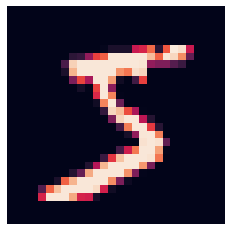

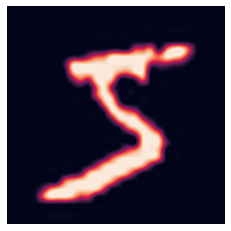

In [5]:
num = train_list[0].split(',')
pixel_array = np.asfarray(num[1:]).reshape((28,28))
pyplot.axis('off')
pyplot.imshow(pixel_array)
pyplot.show()
pyplot.axis('off')
pyplot.imshow(pixel_array, interpolation='spline36')
pyplot.show()

## train

In [6]:
for record in train_list:
    
    data_list = record.split(',')
    
    target_list = np.zeros(10)+0.01
    target_list[int(data_list[0])] = 0.99
    
    input_list =(np.asfarray(data_list[1:])/255*0.99)+0.01
    nn.train(input_list,target_list)
    pass    

## test

In [7]:
score = []
for record in test_list:
    data_list = record.split(',')
    
    answer = int(data_list[0])
    
    input_list =(np.asfarray(data_list[1:])/255*0.99)+0.01
    output = nn.query(input_list)
    
    query_answer = np.argmax(output)
    
    if (query_answer == answer):
        score.append(1)
    else:
        score.append(0)
        pass
    pass    

In [25]:
score_array = np.array(score)
score__ = []
score__.append(score_array.sum()/score_array.size)
print(score_array.sum()/score_array.size)

0.9482


## 직접 쓴 숫자로 테스트

In [9]:
img_array2 = imageio.imread('dataset/2.png')
img2 = np.array(img_array2)
np.savetxt('test.txt',img2[0],fmt = '%2d',delimiter=',',header='test')

img_array = imageio.imread('dataset/2.png', as_gray=True)

img_data  = 255.0 - img_array.reshape(784)

img_data = (img_data / 255.0 * 0.99) + 0.01

In [10]:
print(np.argmax(nn.query(img_data)))

2


## 여러 모델로 테스트

In [19]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
lr = 0.3
nn2 = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, lr)
nn3 = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, lr)
nn4 = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, lr)
nn5 = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, lr)
nn6 = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, lr)
nn7 = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, lr)
nn8 = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, lr)
nn9 = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, lr)
nn10 = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, lr)

In [36]:
hidden_nodes = 200
nn2 = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, lr)

In [37]:
epochs =2
for i in range(epochs):
    for record in train_list:
        data_list = record.split(',')
        target_list = np.zeros(10)+0.01
        target_list[int(data_list[0])] = 0.99
        input_list =(np.asfarray(data_list[1:])/255*0.99)+0.01
        nn2.train(input_list,target_list)
        pass  
    pass

In [20]:
epochs =3
for i in range(epochs):
    for record in train_list:
        data_list = record.split(',')
        target_list = np.zeros(10)+0.01
        target_list[int(data_list[0])] = 0.99
        input_list =(np.asfarray(data_list[1:])/255*0.99)+0.01
        nn3.train(input_list,target_list)
        pass  
    pass

In [21]:
epochs =4
for i in range(epochs):
    for record in train_list:
        data_list = record.split(',')
        target_list = np.zeros(10)+0.01
        target_list[int(data_list[0])] = 0.99
        input_list =(np.asfarray(data_list[1:])/255*0.99)+0.01
        nn4.train(input_list,target_list)
        pass  
    pass
epochs =5
for i in range(epochs):
    for record in train_list:
        data_list = record.split(',')
        target_list = np.zeros(10)+0.01
        target_list[int(data_list[0])] = 0.99
        input_list =(np.asfarray(data_list[1:])/255*0.99)+0.01
        nn2.train(input_list,target_list)
        pass  
    pass

In [22]:
epochs =6
for i in range(epochs):
    for record in train_list:
        data_list = record.split(',')
        target_list = np.zeros(10)+0.01
        target_list[int(data_list[0])] = 0.99
        input_list =(np.asfarray(data_list[1:])/255*0.99)+0.01
        nn6.train(input_list,target_list)
        pass  
    pass
epochs =7
for i in range(epochs):
    for record in train_list:
        data_list = record.split(',')
        target_list = np.zeros(10)+0.01
        target_list[int(data_list[0])] = 0.99
        input_list =(np.asfarray(data_list[1:])/255*0.99)+0.01
        nn7.train(input_list,target_list)
        pass  
    pass

In [23]:
epochs =8
for i in range(epochs):
    for record in train_list:
        data_list = record.split(',')
        target_list = np.zeros(10)+0.01
        target_list[int(data_list[0])] = 0.99
        input_list =(np.asfarray(data_list[1:])/255*0.99)+0.01
        nn8.train(input_list,target_list)
        pass  
    pass
epochs =9
for i in range(epochs):
    for record in train_list:
        data_list = record.split(',')
        target_list = np.zeros(10)+0.01
        target_list[int(data_list[0])] = 0.99
        input_list =(np.asfarray(data_list[1:])/255*0.99)+0.01
        nn9.train(input_list,target_list)
        pass  
    pass

In [24]:
epochs =10
for i in range(epochs):
    for record in train_list:
        data_list = record.split(',')
        target_list = np.zeros(10)+0.01
        target_list[int(data_list[0])] = 0.99
        input_list =(np.asfarray(data_list[1:])/255*0.99)+0.01
        nn10.train(input_list,target_list)
        pass  
    pass

In [26]:
score = []
for record in test_list:
    data_list = record.split(',')
    answer = int(data_list[0])
    input_list =(np.asfarray(data_list[1:])/255*0.99)+0.01
    output = nn2.query(input_list)
    query_answer = np.argmax(output)
    if (query_answer == answer):
        score.append(1)
    else:
        score.append(0)
        pass
    pass 
score_array = np.array(score)
score__.append(score_array.sum()/score_array.size)

In [28]:
score = []
for record in test_list:
    data_list = record.split(',')
    answer = int(data_list[0])
    input_list =(np.asfarray(data_list[1:])/255*0.99)+0.01
    output = nn3.query(input_list)
    query_answer = np.argmax(output)
    if (query_answer == answer):
        score.append(1)
    else:
        score.append(0)
        pass
    pass 
score_array = np.array(score)
score__.append(score_array.sum()/score_array.size)
score = []
for record in test_list:
    data_list = record.split(',')
    answer = int(data_list[0])
    input_list =(np.asfarray(data_list[1:])/255*0.99)+0.01
    output = nn4.query(input_list)
    query_answer = np.argmax(output)
    if (query_answer == answer):
        score.append(1)
    else:
        score.append(0)
        pass
    pass 
score_array = np.array(score)
score__.append(score_array.sum()/score_array.size)
score = []
for record in test_list:
    data_list = record.split(',')
    answer = int(data_list[0])
    input_list =(np.asfarray(data_list[1:])/255*0.99)+0.01
    output = nn5.query(input_list)
    query_answer = np.argmax(output)
    if (query_answer == answer):
        score.append(1)
    else:
        score.append(0)
        pass
    pass 
score_array = np.array(score)
score__.append(score_array.sum()/score_array.size)
score = []
for record in test_list:
    data_list = record.split(',')
    answer = int(data_list[0])
    input_list =(np.asfarray(data_list[1:])/255*0.99)+0.01
    output = nn6.query(input_list)
    query_answer = np.argmax(output)
    if (query_answer == answer):
        score.append(1)
    else:
        score.append(0)
        pass
    pass 
score_array = np.array(score)
score__.append(score_array.sum()/score_array.size)
score = []
for record in test_list:
    data_list = record.split(',')
    answer = int(data_list[0])
    input_list =(np.asfarray(data_list[1:])/255*0.99)+0.01
    output = nn7.query(input_list)
    query_answer = np.argmax(output)
    if (query_answer == answer):
        score.append(1)
    else:
        score.append(0)
        pass
    pass 
score_array = np.array(score)
score__.append(score_array.sum()/score_array.size)
score = []
for record in test_list:
    data_list = record.split(',')
    answer = int(data_list[0])
    input_list =(np.asfarray(data_list[1:])/255*0.99)+0.01
    output = nn8.query(input_list)
    query_answer = np.argmax(output)
    if (query_answer == answer):
        score.append(1)
    else:
        score.append(0)
        pass
    pass 
score_array = np.array(score)
score__.append(score_array.sum()/score_array.size)
score = []
for record in test_list:
    data_list = record.split(',')
    answer = int(data_list[0])
    input_list =(np.asfarray(data_list[1:])/255*0.99)+0.01
    output = nn9.query(input_list)
    query_answer = np.argmax(output)
    if (query_answer == answer):
        score.append(1)
    else:
        score.append(0)
        pass
    pass 
score_array = np.array(score)
score__.append(score_array.sum()/score_array.size)
score = []
for record in test_list:
    data_list = record.split(',')
    answer = int(data_list[0])
    input_list =(np.asfarray(data_list[1:])/255*0.99)+0.01
    output = nn10.query(input_list)
    query_answer = np.argmax(output)
    if (query_answer == answer):
        score.append(1)
    else:
        score.append(0)
        pass
    pass 
score_array = np.array(score)
score__.append(score_array.sum()/score_array.size)

In [31]:
x = np.arange(11)

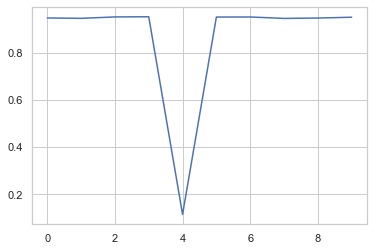

In [34]:
pyplot.plot(x,score__)

In [35]:
print(score__)

[0.9482, 0.9466, 0.9526, 0.9534, 0.1144, 0.9521, 0.9524, 0.9463, 0.9479, 0.9514]


In [38]:
for record in test_list:
    data_list = record.split(',')
    answer = int(data_list[0])
    input_list =(np.asfarray(data_list[1:])/255*0.99)+0.01
    output = nn2.query(input_list)
    query_answer = np.argmax(output)
    if (query_answer == answer):
        score.append(1)
    else:
        score.append(0)
        pass
    pass 
score_array = np.array(score)
print(score_array.sum()/score_array.size)

0.95415


In [39]:
input_nodes = 784
hidden_nodes = 300
output_nodes = 10
lr = 0.1

nn11 = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, lr)
for i in range(10):
    for record in train_list:
        data_list = record.split(',')
        target_list = np.zeros(10)+0.01
        target_list[int(data_list[0])] = 0.99
        input_list =(np.asfarray(data_list[1:])/255*0.99)+0.01
        nn11.train(input_list,target_list)
        pass  
    pass
score = []
for record in test_list:
    data_list = record.split(',')
    answer = int(data_list[0])
    input_list =(np.asfarray(data_list[1:])/255*0.99)+0.01
    output = nn11.query(input_list)
    query_answer = np.argmax(output)
    if (query_answer == answer):
        score.append(1)
    else:
        score.append(0)
        pass
    pass 
score_array = np.array(score)
print(score_array.sum()/score_array.size)

0.9746


In [40]:
input_nodes = 784
hidden_nodes = 500
output_nodes = 10
lr = 0.1

nn12 = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, lr)
for i in range(5):
    for record in train_list:
        data_list = record.split(',')
        target_list = np.zeros(10)+0.01
        target_list[int(data_list[0])] = 0.99
        input_list =(np.asfarray(data_list[1:])/255*0.99)+0.01
        nn12.train(input_list,target_list)
        pass  
    pass
score = []
for record in test_list:
    data_list = record.split(',')
    answer = int(data_list[0])
    input_list =(np.asfarray(data_list[1:])/255*0.99)+0.01
    output = nn12.query(input_list)
    query_answer = np.argmax(output)
    if (query_answer == answer):
        score.append(1)
    else:
        score.append(0)
        pass
    pass 
score_array = np.array(score)
print(score_array.sum()/score_array.size)

0.973
